

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.








## Questions for Analysis
<ul>
<li><a href="#1">1- Are movies with a high budget make more revenue?</a></li>
<li><a href="#2">2- What is the highest grossing movie?</a></li>
<li><a href="#3">3- Who is the most profitable director?</a></li>
<li><a href="#4">4- Who are the most film-making directors?</a></li>
<li><a href="#5">5- What is the longest movie in terms of duration?</a></li>
<li><a href="#6">6- How many movies are released each year and which period was the most?</a></li>
<li><a href="#7">7- What are the years with the highest returns?</a></li>
<li><a href="#8">8- Who is the most profitable actor ?</a></li>
<li><a href="#9">9- Which company released most movies?</a></li>
</ul>



In [1]:
# set up import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import itertools



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
# Loading data 
df = pd.read_csv('tmdb-movies.csv')

In [4]:
# print out a few lines
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
# Get rid of columns that we will not use in the analysis process
df.drop(['id', 'imdb_id', 'homepage', 'release_date','tagline'], axis = 1, inplace = True)
df.shape

(10866, 16)

## assessing

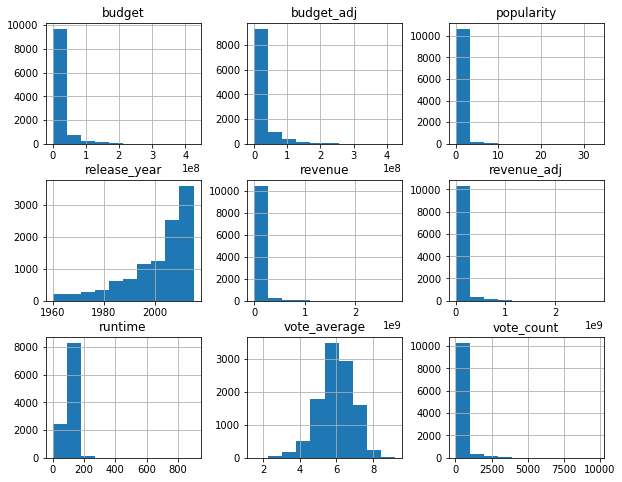

In [7]:
# Perform operations to inspect data
df.hist(figsize=(10,8));


In [8]:
# types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [9]:
# Perform general description to inspect data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Notes that revenue and budget have a zero values 

In [10]:
# display how many rows have zero value
sum(df.revenue == 0) , sum(df.budget == 0)

(6016, 5696)

#### Because of the large size of zero value Decided to not fill or delete to not effect other analysis  and deal with it later

### Data Cleaning

In [11]:
# check if there are any duplication rows
sum(df.duplicated())

1

In [12]:
# check the missing data
df.columns[df.isnull().any()]

Index(['cast', 'director', 'keywords', 'overview', 'genres',
       'production_companies'],
      dtype='object')

In [13]:
# check the missing data
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# drop duplicated row and Check for drop successfully 
df.drop_duplicates(inplace=True)
df.shape

(10865, 16)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='1'></a>
## Question  1
### Are movies with a high budget make more revenue?

In [15]:
#Creat new data frame for revenue and other related columns
df_budget = df[['budget','revenue','original_title','director','release_year','vote_average']]
df_budget.head()

,budget,revenue,original_title,director,release_year,vote_average
0,150000000,1513528810,Jurassic World,Colin Trevorrow,2015,6.5
1,150000000,378436354,Mad Max: Fury Road,George Miller,2015,7.1
2,110000000,295238201,Insurgent,Robert Schwentke,2015,6.3
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,2015,7.5
4,190000000,1506249360,Furious 7,James Wan,2015,7.3


In [16]:
df_budget.describe()

,budget,revenue,release_year,vote_average
count,1.086500e+04,1.086500e+04,10865.000000,10865.000000
mean,1.462429e+07,3.982690e+07,2001.321859,5.975012
std,3.091428e+07,1.170083e+08,12.813260,0.935138
min,0.000000e+00,0.000000e+00,1960.000000,1.500000
25%,0.000000e+00,0.000000e+00,1995.000000,5.400000
50%,0.000000e+00,0.000000e+00,2006.000000,6.000000
75%,1.500000e+07,2.400000e+07,2011.000000,6.600000
max,4.250000e+08,2.781506e+09,2015.000000,9.200000


In [17]:
# removing zero value data in budget 
df_budget_nonzero= df_budget[df_budget['budget'] != 0]

In [18]:
#makeing sure thar theres no zero value any more
sum(df_budget_nonzero.budget == 0) 

0

In [19]:
# creat new dataframe withe no zero value data in revenue 
df_revenue_nonzero= df_budget_nonzero[df_budget_nonzero['revenue'] != 0]
sum(df_budget_nonzero.budget == 0) 

0

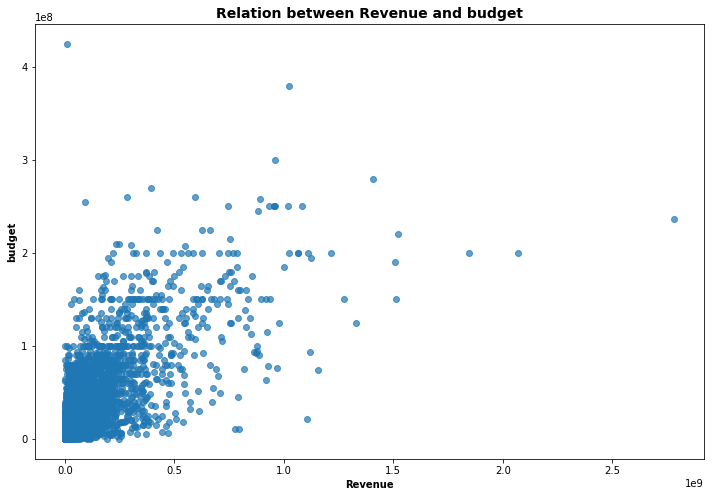

In [20]:
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(df_revenue_nonzero['revenue'],
            df_revenue_nonzero['budget'], 
            alpha = 0.7) #transparency level of points on the plot. Used to avoid overplotting
# add and format additional elements, such as titles and axis labels
plt.title("Relation between Revenue and budget", 
          fontsize = 14, 
          weight = "bold")
plt.xlabel("Revenue", weight = "bold")
plt.ylabel("budget", weight = "bold")
plt.show()

                  The chart shows that there is a positive correlation between movies budget and revenue
                         that means the high budget movies have more chance to gain high revenue

<a id='2'></a>
## Question  2
### What is the highest grossing movie?

In [21]:
#Use max to get highest revenue value
df_revenue_nonzero.revenue.max()

2781505847

In [22]:
# use the highest revenue value to find which movie title related
most_high_revenue_movie = df_revenue_nonzero.query('revenue == 2781505847 ')['original_title'].to_string(index=False)
print ('Most high revenue movies is  : %s' %most_high_revenue_movie)

Most high revenue movies is  :  Avatar


<a id='3'></a>
## Question 3
### Who is the most profitable director  ?

In [23]:
# use the highest revenue value to find which director name related
most_high_revenue_director=  df_revenue_nonzero.query('revenue == 2781505847 ')['director'].to_string(index=False)
print ('Most high revenue director is : %s' %most_high_revenue_director)

Most high revenue director is :  James Cameron


<a id='4'></a>
## Question 4
### Who are the most film-making directors? 

In [24]:
#Find which of the directors name is the most frequent by using mode
most_making = df['director'].mode().to_string(index=False)
print ('Most directors who have made more films is  : %s' %most_making)

Most directors who have made more films is  :  Woody Allen


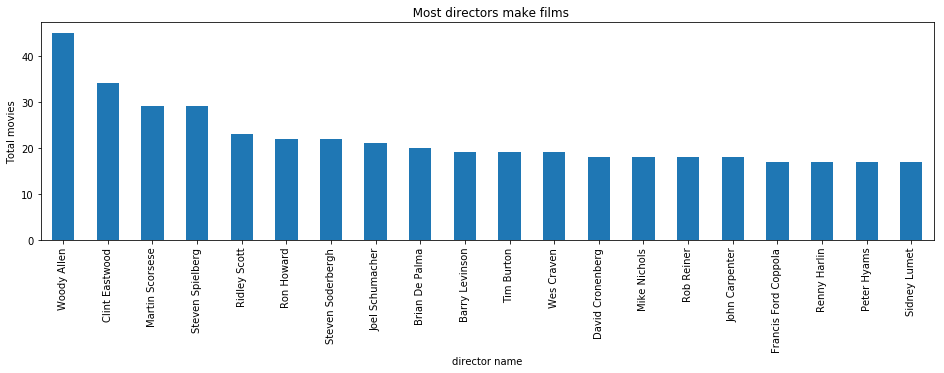

In [25]:
# get counts for each director
df_most_directors = df['director'].value_counts() #Who are the directors who have made more films?
df_most_directors.nlargest(20).plot(title='  Most directors make films',kind= 'bar',figsize = (16,4) );
plt.xlabel('director name');
plt.ylabel('Total movies');

                 According to the chart , we find that most directors  have made movies are
                     Woody Allen with 45 films then  Clint Eastwood with 34 films

<a id='5'></a>
## Question 5
### What is the longest movie in terms of duration?


In [26]:
# Find the longest movie duration using max
max_duration = df['runtime'].max()


In [27]:
#use longest film duration to find title name related
longest_duration = df.query('runtime == {}'.format(max_duration))['original_title'].to_string(index=False) 
print ('The longest movie in terms of duration is :-  %s' %longest_duration)

The longest movie in terms of duration is :-   The Story of Film: An Odyssey


<a id='6'></a>
## Question 6
### How many movies are released each year and which period was the most?

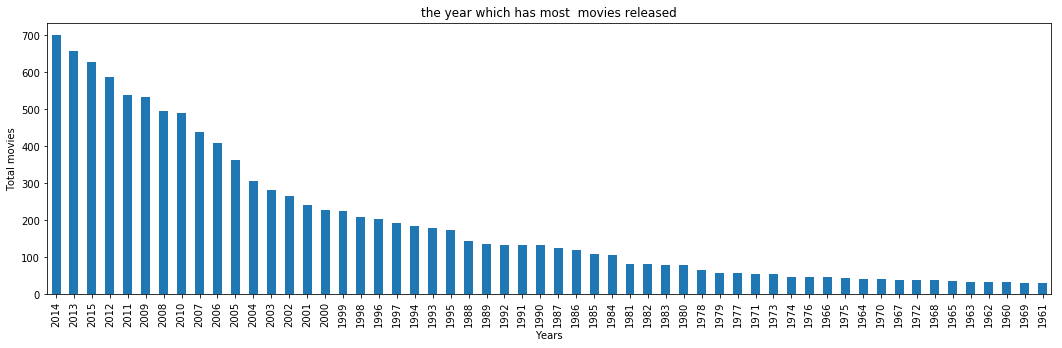

In [28]:
#Create a bar chart for count of movie evert year using the original data frame
df['release_year'].value_counts().plot(title='the year which has most  movies released',kind= 'bar',figsize = (18,5) );# In which year most movies were released?
plt.xlabel('Years');
plt.ylabel('Total movies');

                            Here we find most released movies were in 2014,2013 then in 2015

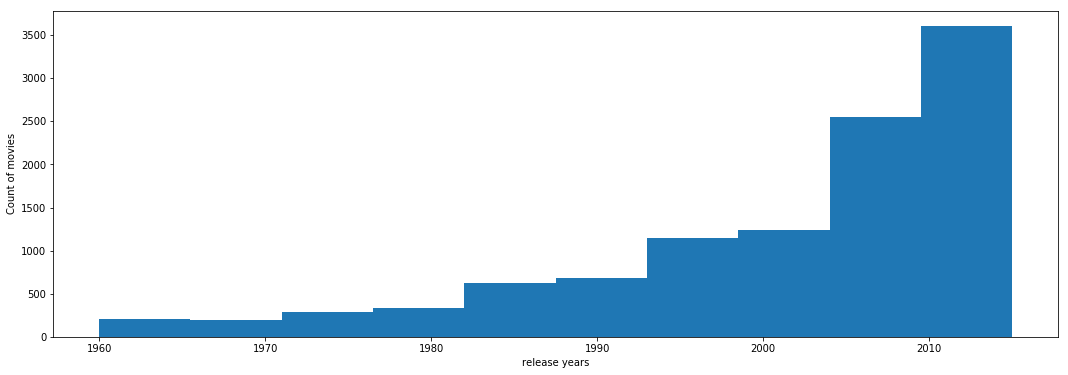

In [29]:
# movies release over time 
df.release_year.plot(kind='hist',figsize = (18,6));
plt.xlabel('release years');
plt.ylabel('Count of movies');

    according to the distribution chart the highest period of released movies all over the time was between 2010 and 2015                                                    

<a id='7'></a>
## Question 7
### What are the years with the highest returns?

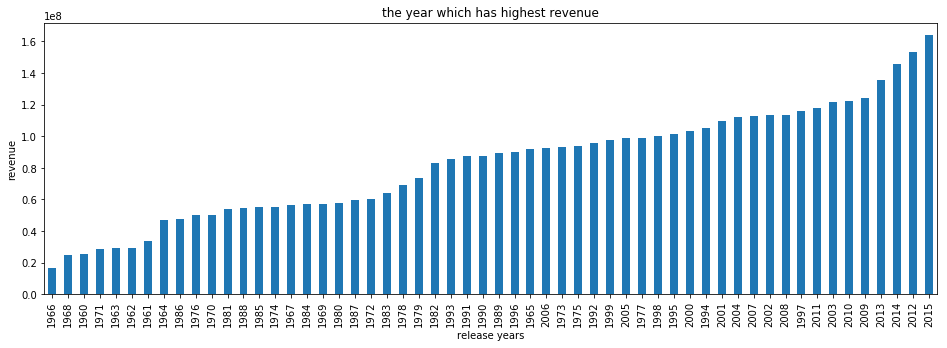

In [30]:
##Create a bar chart for average revenue for every every year
df_revenue_nonzero.groupby('release_year')['revenue'].mean().sort_values().plot(x = 'release_year', y = 'revenue',title='the year which has highest revenue',kind= 'bar',figsize = (16,5) );
plt.xlabel('release years');
plt.ylabel('revenue');

                      The chart shows that the highest revenue was made in 2015 then comes  2012 then 2014 
                             It also shows that the movies industry showed growth all over the time

<a id='8'></a>
## Question 8
### Who is the most profitable actor ?

In [31]:
# creat a function to split as splitter
def splitter (col):
    column_split = df[col].str.split(pat="|", expand=True)
    return column_split

In [32]:
#use splitter function to split variable in the cast column
df_actors = splitter('cast')

In [33]:
# creat a new dataframe with split variable in the cast column
df_cast = pd.concat([df_revenue_nonzero,df_actors], axis=1)
df_cast.head(2)

,budget,revenue,original_title,director,release_year,vote_average,0,1,2,3,4
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,2015.0,6.5,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,2015.0,7.1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman


In [34]:
# change colmun name
df_cast.rename(columns = {0:'actor_star',1:'actor_2',2:'actor_3',3:'actor_4',4:'actor_5'}, inplace=True)
df_cast.head(2)

,budget,revenue,original_title,director,release_year,vote_average,actor_star,actor_2,actor_3,actor_4,actor_5
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,2015.0,6.5,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,2015.0,7.1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman


In [35]:
#use dscribe in revenue clomun to find highest average of revenue
df_revenue_nonzero.revenue.describe()

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [36]:
# Use the query to determine 75% of revenue and more 
mask =df_cast.query('revenue>=1242125000')

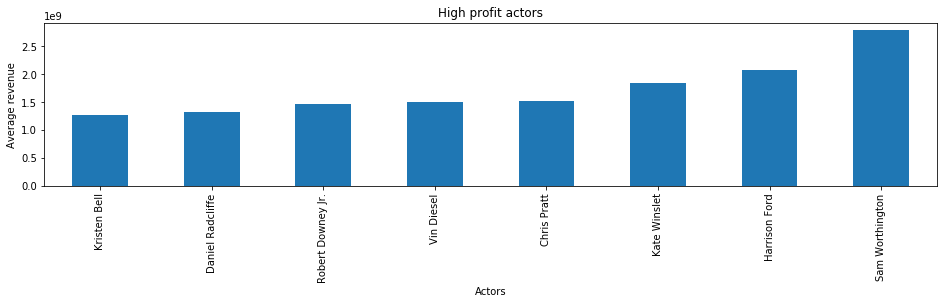

In [37]:
# Use groupby to get the name of the actor associated with high average revenue
mask.groupby('actor_star')['revenue'].mean().sort_values().plot(title='High profit actors',kind= 'bar',figsize = (16,3))
plt.xlabel('Actors');
plt.ylabel('Average revenue');

### according to the chart we found that  'Sam Worthington' is the most profitable actor but after a little search we will find that  Harrison Ford and Kate Winslet are the highest-grossing actors and 'Sam Worthington' is not included  and that for several reasons for example : 
#### 1- because of revenue zero values in data 
#### 2- Sam Worthington's avatar movie which has the highest revenue with a big difference comparing other movies

  ### so we look for  Harrison Ford and Kate Winslet statistics 
  #### checking  reason 1

In [38]:
#creat dataframe by Harrison Ford as actor
Ford = df[df['cast'].str.contains("Harrison Ford", na = False)]

In [39]:
# Show general stats
Ford.revenue.describe()

count    4.200000e+01
mean     2.124486e+08
std      3.587855e+08
min      0.000000e+00
25%      1.451066e+07
50%      8.891011e+07
75%      2.199493e+08
max      2.068178e+09
Name: revenue, dtype: float64

In [40]:
# Check the number of movies by Harrison Ford at zero revenue value
Ford.query('revenue ==0').shape

(6, 16)

In [41]:
#creat dataframe by  Kate Winslet as actor
Kate= df[df['cast'].str.contains('Kate Winslet', na = False)]

In [42]:
# Show general stats
Kate.revenue.describe()

count    3.100000e+01
mean     1.096964e+08
std      3.321256e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.570501e+07
75%      7.374191e+07
max      1.845034e+09
Name: revenue, dtype: float64

In [43]:
# Check the number of movies by Kate Winslet at zero revenue value
Kate.query('revenue ==0').shape

(10, 16)

In [44]:
#creat dataframe by Robert Sam Worthington as actor
Sam=df[df['cast'].str.contains('Sam Worthington', na = False)]


In [45]:
# Show general stats
Sam.revenue.describe()

count    1.500000e+01
mean     2.671979e+08
std      7.068280e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.750852e+07
75%      2.180704e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [46]:
#Check the number of movies by Sam Worthington at zero revenue value
Sam.query('revenue ==0').shape

(5, 16)

#### movies with zero value for Scarlett Johansson and Sam Worthington are almost equal and for  Robert Downey more with 5  movies
#### so it's not about zero value

### so will check  about Avatar movie  if  it the reason as outlier
#### checking reason 2

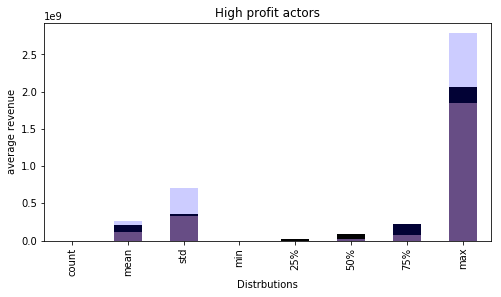

In [47]:
Ford.revenue.describe().plot(title='High profit actors',color='black',alpha =0.99,kind= 'bar',figsize = (8,4)),
Kate.revenue.describe().plot(title='High profit actors',color='pink',alpha =0.5,kind= 'bar',figsize = (8,4)),
Sam.revenue.describe().plot(title='High profit actors',color='blue',alpha =0.2,kind= 'bar',figsize = (8,4));
plt.xlabel('Distrbutions');
plt.ylabel('average revenue');

  Noted here that just the maximum value and standard deviation value for Sam Worthington are much high

            which may be affected by the highest revenue movie ' Avatar'

In [48]:
# as mentioned before 'avatar' has a highest revenue before
# get max value for Sam Worthington
avatar_value = Sam.revenue.max()
avatar_value

2781505847

In [49]:
#Find total revenue without avatar revenue by subtracting its value
Sam_without_avatar =  Sam.revenue.sum() - avatar_value


In [50]:
#check the difference between Scarlett Johansson's total revenue and Sam Worthington's revenue without avatar
Sam_without_avatar >= Ford.revenue.sum()

False

In [51]:
#check the difference between Kate Winslet's revenue and Sam Worthington's revenue without avatar
Sam_without_avatar >= Kate.revenue.sum()

False

### here we find that  Avata's was the  resone to show 'Sam Worthington' as a hight brofitable actor

<a id='9'></a>
## Question 9
### Which company released most movies?

In [52]:
#use splitter function to split variable in the production_companies column 
df_production_companies = splitter('production_companies')

In [53]:
# conect dataframe with split variable in the production_companies column with no zero value data
df_production_companies = pd.concat([df_revenue_nonzero,df_production_companies], axis=1)
df_production_companies.head()

,budget,revenue,original_title,director,release_year,vote_average,0,1,2,3,4
0,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,2015.0,6.5,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,2015.0,7.1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,2015.0,6.3,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,2015.0,7.5,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,190000000.0,1.506249e+09,Furious 7,James Wan,2015.0,7.3,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [54]:
 #creat a function to get count of each production company
def counter (col):
    company_count = df_production_companies[0].value_counts().dropna()
    return company_count

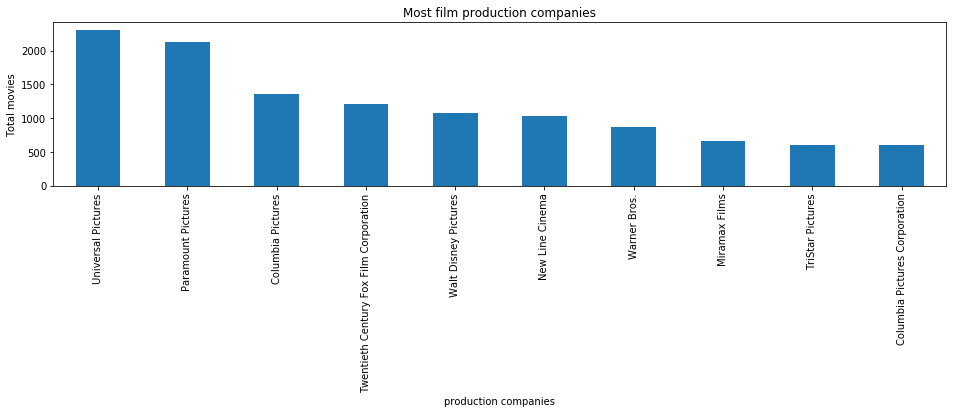

In [55]:
# Find count of each production company in all the divided columns by counter function
(counter(0)+ counter(1)+ counter(2)+ counter(3)+ counter(4)).nlargest(10).plot(title='Most film production companies',kind= 'bar',figsize = (16,3));
plt.xlabel('production companies');
plt.ylabel('Total movies');

                              companie released most movies is Universal Pictures with 2300 movie 
                        then comes Paramount Pictures with 2130 movie then Columbia Picture with 1355 movie

<a id='conclusions'></a>
## Conclusions




## 1- Are movies with a high budget make more revenue?
### -We found that there is a positive correlation between so high budget movies, having more chance to gain higher revenue than low-budget movies

## 2- What is the highest grossing movie?
### -Most high revenue movies is    Avatar


## 3- Who is the most profitable director?
### -Most high revenue director is   'James Cameron'


## 4- Who are the most film-making directors?
### -Most directors who have made more films is   'Woody Allen'


## 5- What is the longest movie in terms of duration?
### -The longest movie in terms of duration is :-   The Story of Film: An Odyssey


## How many movies are released each year and which period was the most?
### most released movies period was from 2010 to 2015 by 
### 2014 -   700 movies
### 2013 -   659 movies
### 2015 -   629 movies
### 2012 -   588 movies
### 2011 -   540 movies

## 7- What are the years with the highest returns?
###  Year's Highest revenue are 2015 then 2012 then 2014 then 2013



## 9- Which companies released most movies?


### the companies released most movies are  :
### Universal Pictures       with                2300 movie
###                                                                          Paramount Pictures     2130 movie
###                                                                          Columbia Picture    with       1355 movie




## Data Limitations 

the data provided by the dataset is sufficient to draw good conclusions but I  noticed several problems that may affect judgment and  exploring data for example :
- the are many 'non' values in the dataset which have a high effect

- most of the remaining data are 0-valued and treated as missing values and after cleaning is pretty insufficient.

## Recommendations

 so  we recommend doing scrapping and research  for a different source for better data quality 

## Conclusive

1. a movie budget has a high effect on movie success.
2. The film industry has become the most attractive industry for investors and it has been constantly growing over the past years

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0